This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [15]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


**Training the same model on MNIST data with noise channels or all-zero channels**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


# 1-1
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6293 - accuracy: 0.8104 - val_loss: 0.2721 - val_accuracy: 0.9209
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9192 - val_loss: 0.2273 - val_accuracy: 0.9336
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9484 - val_loss: 0.1748 - val_accuracy: 0.9475
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9615 - val_loss: 0.1419 - val_accuracy: 0.9594
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9717 - val_loss: 0.1201 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.1192 - val_accuracy: 0.9664
Epoch 

**Plotting a validation accuracy comparison**

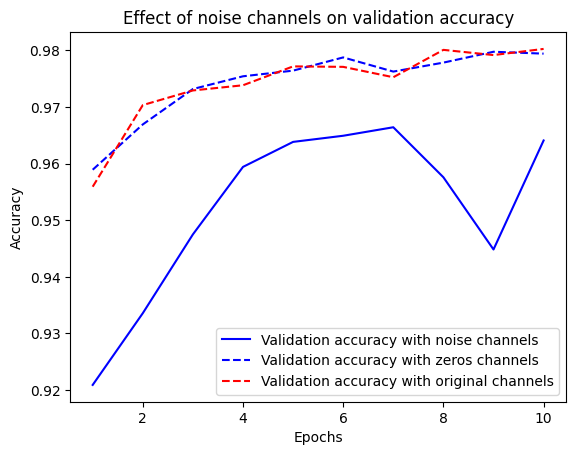

In [19]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3155 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1082
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1148 - val_loss: 2.3073 - val_accuracy: 0.1064
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2918 - accuracy: 0.1256 - val_loss: 2.3175 - val_accuracy: 0.1060
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2798 - accuracy: 0.1385 - val_loss: 2.3210 - val_accuracy: 0.1032
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2643 - accuracy: 0.1513 - val_loss: 2.3322 - val_accuracy: 0.1042
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2471 - accuracy: 0.1625 - val_loss: 2.3442 - val_accuracy: 0.1023
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2237 - accuracy: 0.1772 - val_loss: 2.3596 - val_accuracy: 0.0969

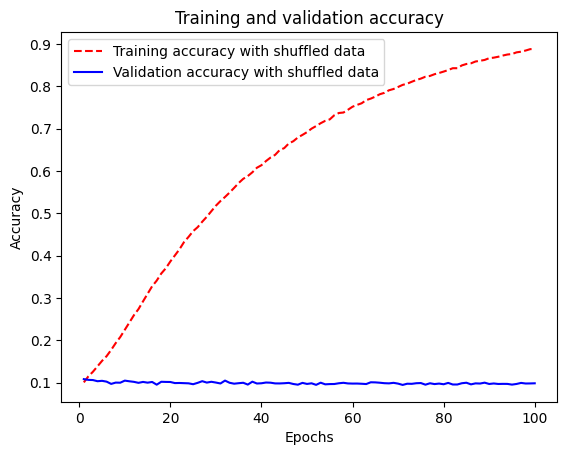

In [23]:
# 1-2
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'r--', label='Training accuracy with shuffled data')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy with shuffled data')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [24]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 746.8536 - accuracy: 0.2878 - val_loss: 5.4196 - val_accuracy: 0.2418
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7093 - accuracy: 0.1858 - val_loss: 2.5971 - val_accuracy: 0.2347
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6681 - accuracy: 0.2090 - val_loss: 2.3319 - val_accuracy: 0.1518
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7217 - accuracy: 0.2316 - val_loss: 2.1577 - val_accuracy: 0.1998
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4688 - accuracy: 0.2081 - val_loss: 2.5640 - val_accuracy: 0.2632
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6619 - accuracy: 0.2170 - val_loss: 2.1624 - val_accuracy: 0.1728
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4203 - accuracy: 0.2225 - val_loss: 2.2854 - val_accuracy: 0.2108
Epoc

**The same model with a more appropriate learning rate**

In [25]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# 2-1
model.compile(optimizer=keras.optimizers.RMSprop(1e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.9184 - accuracy: 0.4876 - val_loss: 1.5533 - val_accuracy: 0.7147
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 1.2967 - accuracy: 0.7696 - val_loss: 1.0394 - val_accuracy: 0.8261
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.9093 - accuracy: 0.8273 - val_loss: 0.7487 - val_accuracy: 0.8543
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.8525 - val_loss: 0.5934 - val_accuracy: 0.8737
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.5782 - accuracy: 0.8680 - val_loss: 0.5054 - val_accuracy: 0.8858
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.8792 - val_loss: 0.4502 - val_accuracy: 0.8937
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4589 - accuracy: 0.8867 - val_loss: 0.4130 - val_accuracy: 0.8987
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [26]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6694 - accuracy: 0.8347 - val_loss: 0.3593 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.9023 - val_loss: 0.3098 - val_accuracy: 0.9144
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3176 - accuracy: 0.9113 - val_loss: 0.2933 - val_accuracy: 0.9192
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9161 - val_loss: 0.2852 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9183 - val_loss: 0.2787 - val_accuracy: 0.9240
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9201 - val_loss: 0.2757 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9219 - val_loss: 0.2718 - val_accuracy: 0.9240
Epoch 

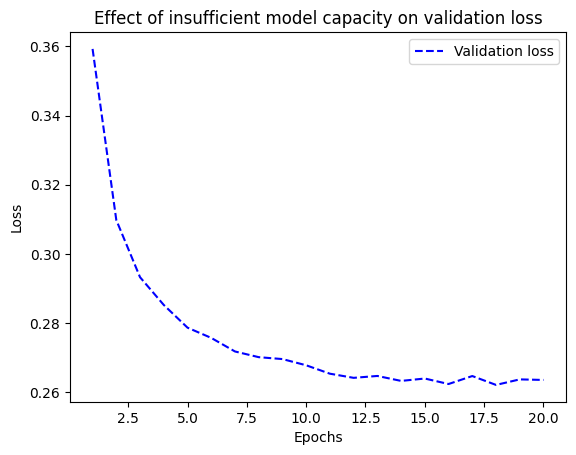

In [31]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary